## 비지도 학습
- 군집화 
- 목적변수 없음

#### 정형화

In [1]:
from sklearn import datasets

In [5]:
iris_dataset = datasets.load_iris()

In [6]:
type(iris_dataset)  ## Bunch; object; dictionary

sklearn.utils._bunch.Bunch

In [8]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
features_train = iris_dataset['data']
features_train.shape

(150, 4)

#### 학습

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2) # 군집을 몇개를 할지 생성할때 지정 및 인스턴스화

In [14]:
model.fit(features_train) #교육

C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [15]:
model.cluster_centers_ 

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

#### 알맞은 cluster 갯수 찾기 

In [21]:
cluster_loops_list = [2, 3, 4, 5, 6, 7, 8, 9, 10] # loop 돌릴 횟수 

result_list = []
for number in cluster_loops_list : 
    model_n = KMeans(n_clusters=number)
    model_n.fit(features_train)
    result_list.append(model_n.inertia_)

C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [17]:
result_list

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.53097186147186,
 30.137843073593075,
 28.12295948883306,
 26.283880912464845]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#### sum of square 
- 평가 방법

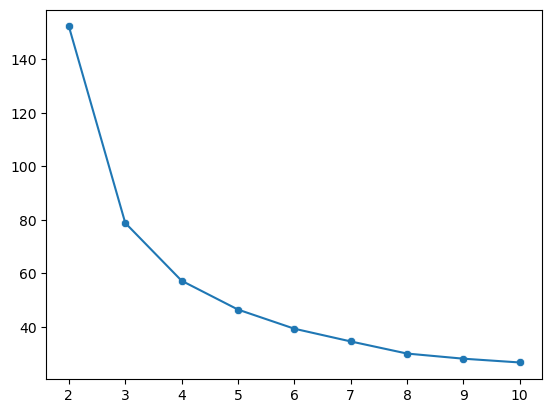

In [27]:
sns.scatterplot(x=cluster_loops_list, y=result_list)
sns.lineplot(x=cluster_loops_list, y=result_list)
plt.show()

## 3, 4에서 급격하게 꺽임 --> 분석자가 3 또는 4로 선정 (목표변수를 모를때)
## 꺾인다는 의미는 중앙값에 분포가 잘된다는 의미

In [28]:
remodel = KMeans(n_clusters=3)
remodel.fit(features_train)

C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\02-19\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
remodel.cluster_centers_ #중앙값

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
remodel.predict(features_train[20:22]) # 중앙값을 기준으로 제일 가까운 인덱스를 나타냄 

array([1, 1])

In [32]:
features_train[20:22]

array([[5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4]])

In [35]:
iris_dataset['target'][20:22] 
## 실제 target의 값 array([0, 0])

array([0, 0])